In [1]:
from pylab import  *
from scipy.integrate import odeint
%matplotlib inline

In [2]:
def ec_mov(x_p,t,a=0):
    r32 = ( x_p[0]**2 + x_p[1]**2 )**(1.5)
    desv = (1.+a)
    dx = x_p[2]*desv
    dy = x_p[3]
    dpx = -(x_p[0]*desv)/r32
    dpy = -(x_p[1]*desv)/r32
    return array([dx,dy,dpx,dpy])

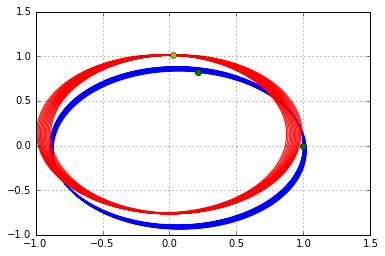

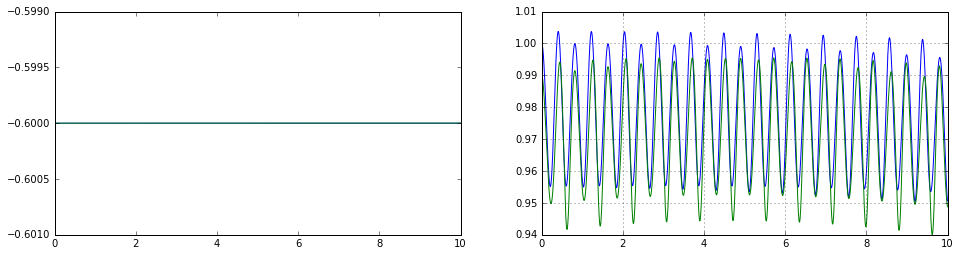

In [86]:
t = linspace(0,2*pi*10,5000)
alfa=0.1
sol=odeint(ec_mov,[1,0,0,1],t,args=(alfa,),rtol=1e-15)
plot(sol[:,0],sol[:,1])
plot([sol[0,0],sol[-1,0]],[sol[0,1],sol[-1,1]],'go')
sol2=odeint(ec_mov,[0.99,sqrt(1-(.99**2)),0,1],t,args=(alfa,),rtol=1e-15)
plot(sol2[:,0],sol2[:,1],'r')
plot([sol[0,0],sol[-1,0]],[sol[0,1],sol[-1,1]],'go')
plot([sol2[-1,0]],[sol2[-1,1]],'yo')
grid(True)
show()
n_cond=sol[-1,:]

def Energia(x_p,a=0):
    x,y,px,py=x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E= 0.5*(1+a)*(px*px) + 0.5*(py*py) - ((1+a)/(sqrt(x**2 + y**2)))
    return E

def Mom_ang(x_p,a=0):
    x,y,px,py=x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    L = x*py - y*px
    return L

E=Energia(sol,alfa)
L=Mom_ang(sol)
E1=Energia(sol2,alfa)
L1=Mom_ang(sol2)
tau=t/(2*pi)
figure(figsize=(16,4),dpi=100)
subplot(1,2,1)
plot(tau,E)
plot(tau,E1)
ylim([E[0]-0.001,E[0]+0.001])
subplot(1,2,2)
plot(tau,L)
plot(tau,L1)
#plot(tau,L-L1)
xlim([0,10])
grid(True)
show()


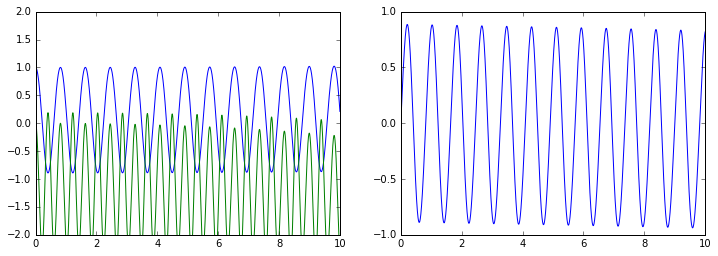

In [87]:
figure(figsize=(12,4))
subplot(1,2,1)
plot(tau,sol[:,0])
plot(tau,50*(L-1))
ylim([-2,2])
xlim([0,10])
subplot(1,2,2)
plot(tau,sol[:,1])
xlim([0,10])
show()